In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import power_transform,StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.rename({'R':'runs','AB':'at_bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walk','SO':'strikeout',
             'SB':'stolen_base','RA':'runs_allowed','ER':'earned_runs','ERA':'earned_run_avg','CG':'Complete Games','SHO':'shoutout','SV':'saves',
             'E':'error','W':'no_of_predicted_wins'},axis=1,inplace=True)

In [5]:
data.head()

,no_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shoutout,saves,error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
data['no_of_predicted_wins'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [7]:
data.shape

(30, 17)

In [8]:
data.isna().sum()

no_of_predicted_wins    0
runs                    0
at_bats                 0
Hits                    0
Doubles                 0
Triples                 0
Homeruns                0
Walk                    0
strikeout               0
stolen_base             0
runs_allowed            0
earned_runs             0
earned_run_avg          0
Complete Games          0
shoutout                0
saves                   0
error                   0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_predicted_wins  30 non-null     int64  
 1   runs                  30 non-null     int64  
 2   at_bats               30 non-null     int64  
 3   Hits                  30 non-null     int64  
 4   Doubles               30 non-null     int64  
 5   Triples               30 non-null     int64  
 6   Homeruns              30 non-null     int64  
 7   Walk                  30 non-null     int64  
 8   strikeout             30 non-null     int64  
 9   stolen_base           30 non-null     int64  
 10  runs_allowed          30 non-null     int64  
 11  earned_runs           30 non-null     int64  
 12  earned_run_avg        30 non-null     float64
 13  Complete Games        30 non-null     int64  
 14  shoutout              30 non-null     int64  
 15  saves                 30 

In [10]:
data.describe()

,no_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shoutout,saves,error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# UNIVARIATE ANALYSIS

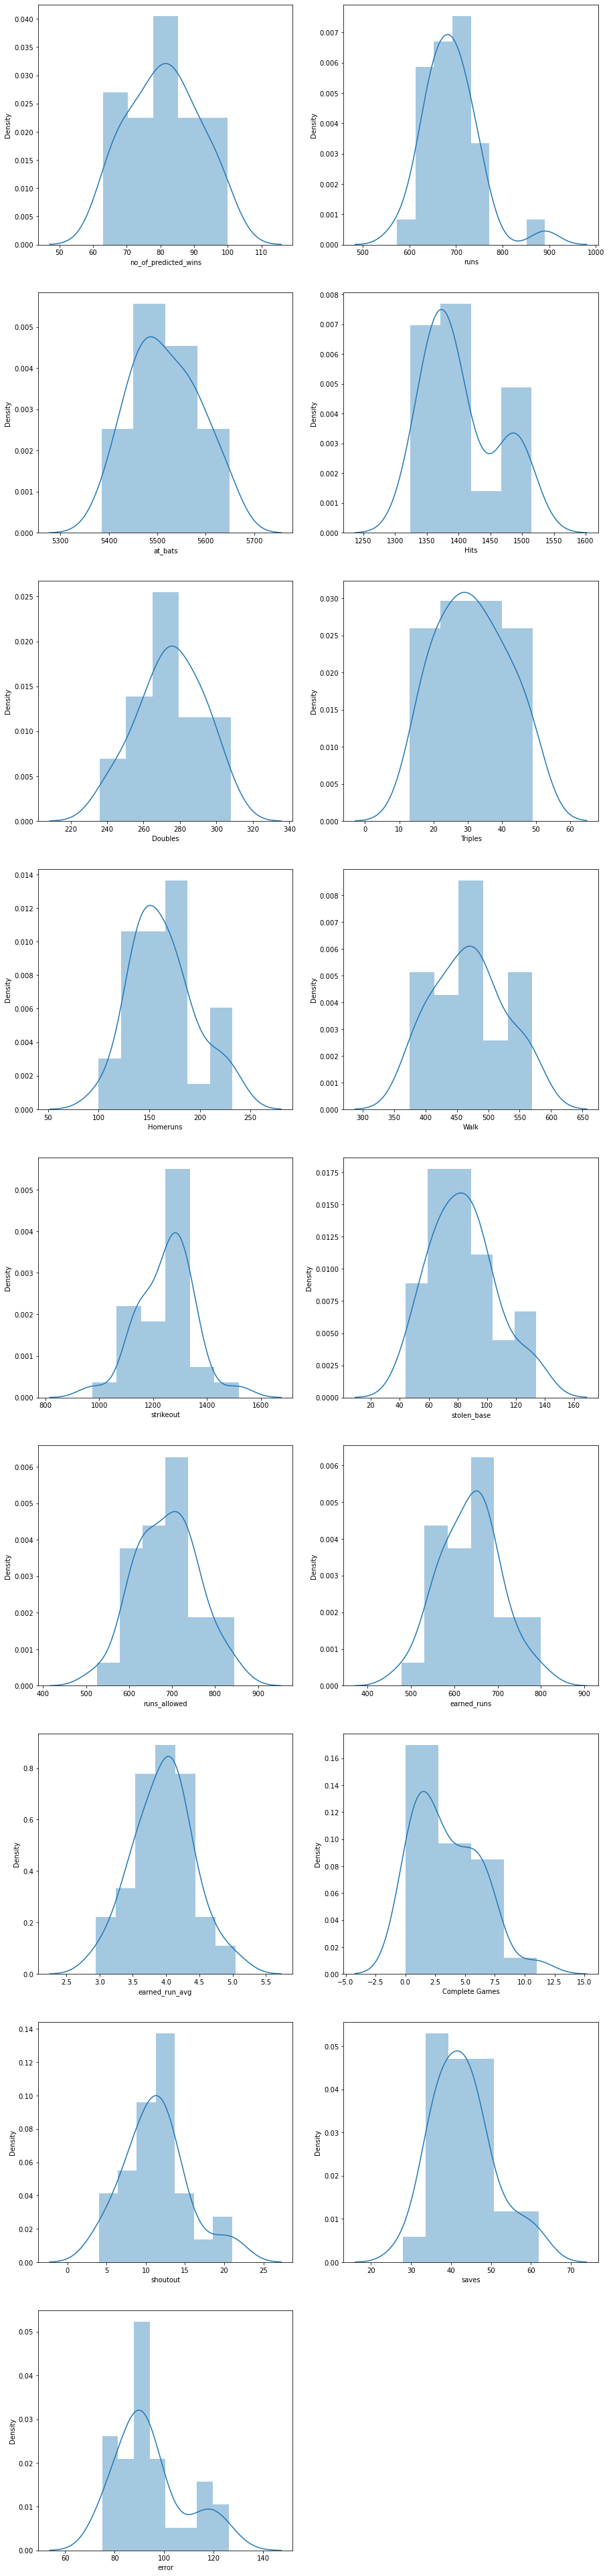

In [11]:
plt.figure(figsize=(15,70))
for i in enumerate(data):
  plt.subplot(9,2,i[0]+1)
  sns.distplot(data[i[1]])

In [12]:
from scipy.stats import norm

In [13]:
data.columns

Index(['no_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error'],
      dtype='object')

In [14]:
col=['no_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error']

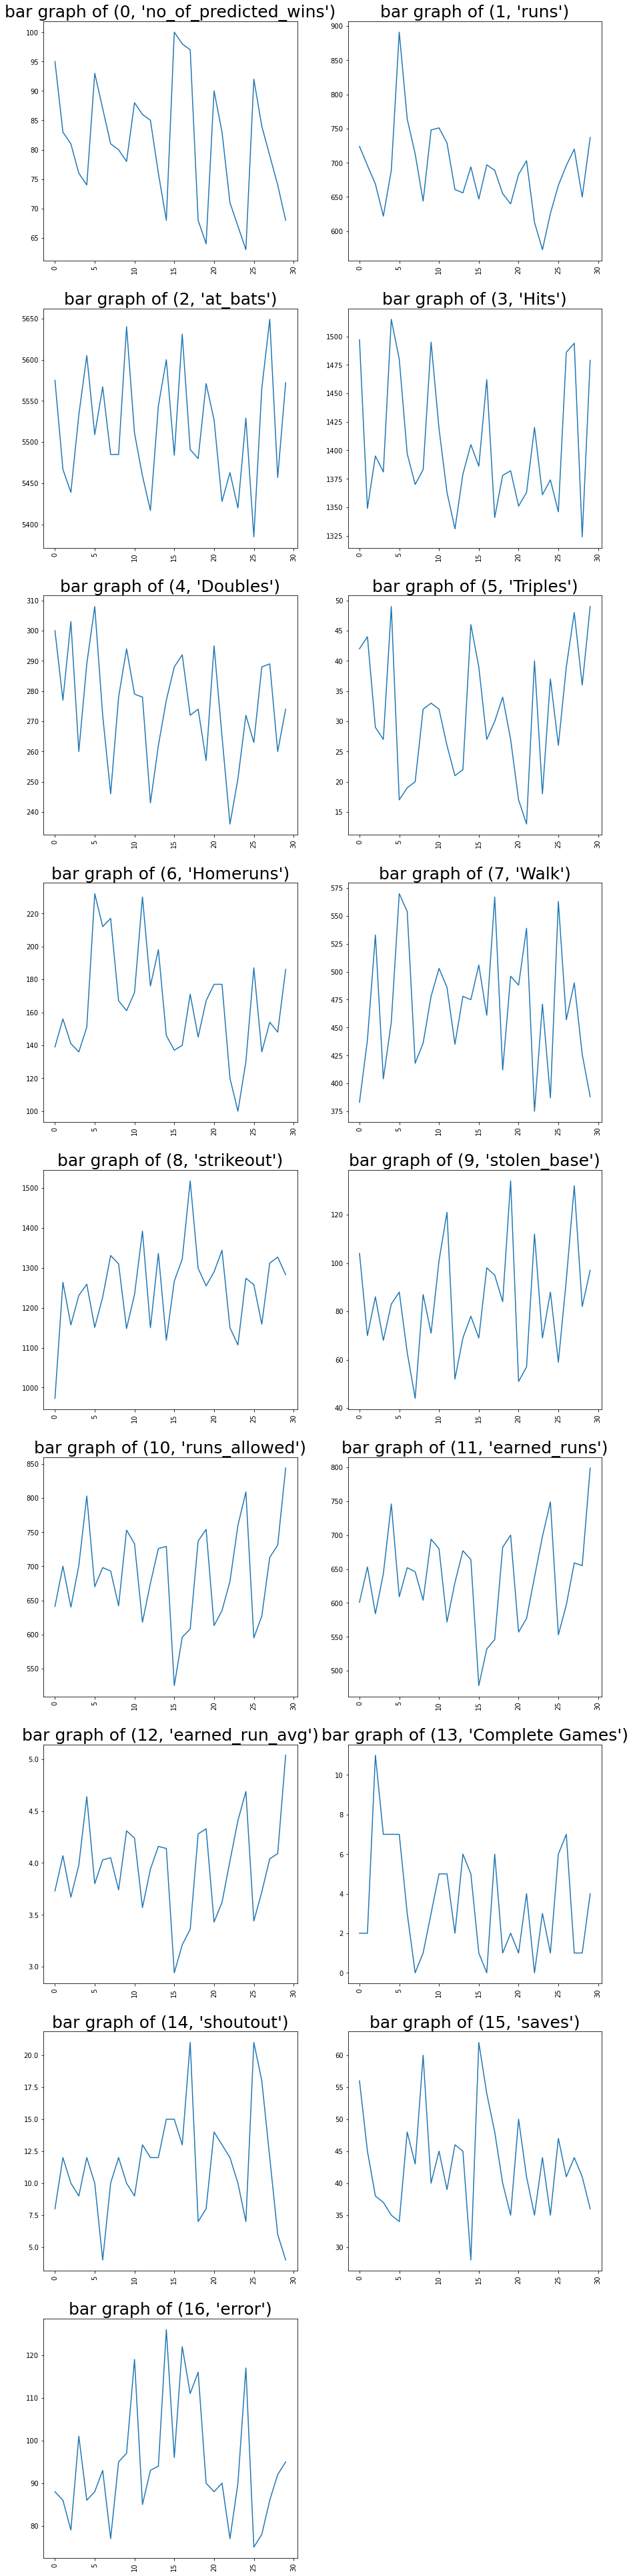

In [15]:
plt.figure(figsize=(15,70))
for i in enumerate(data):
  plt.subplot(9,2,i[0]+1)
  plt.plot(data[i[1]])
  plt.xticks(rotation=90)
  plt.title(f"bar graph of {i}",fontsize=25)

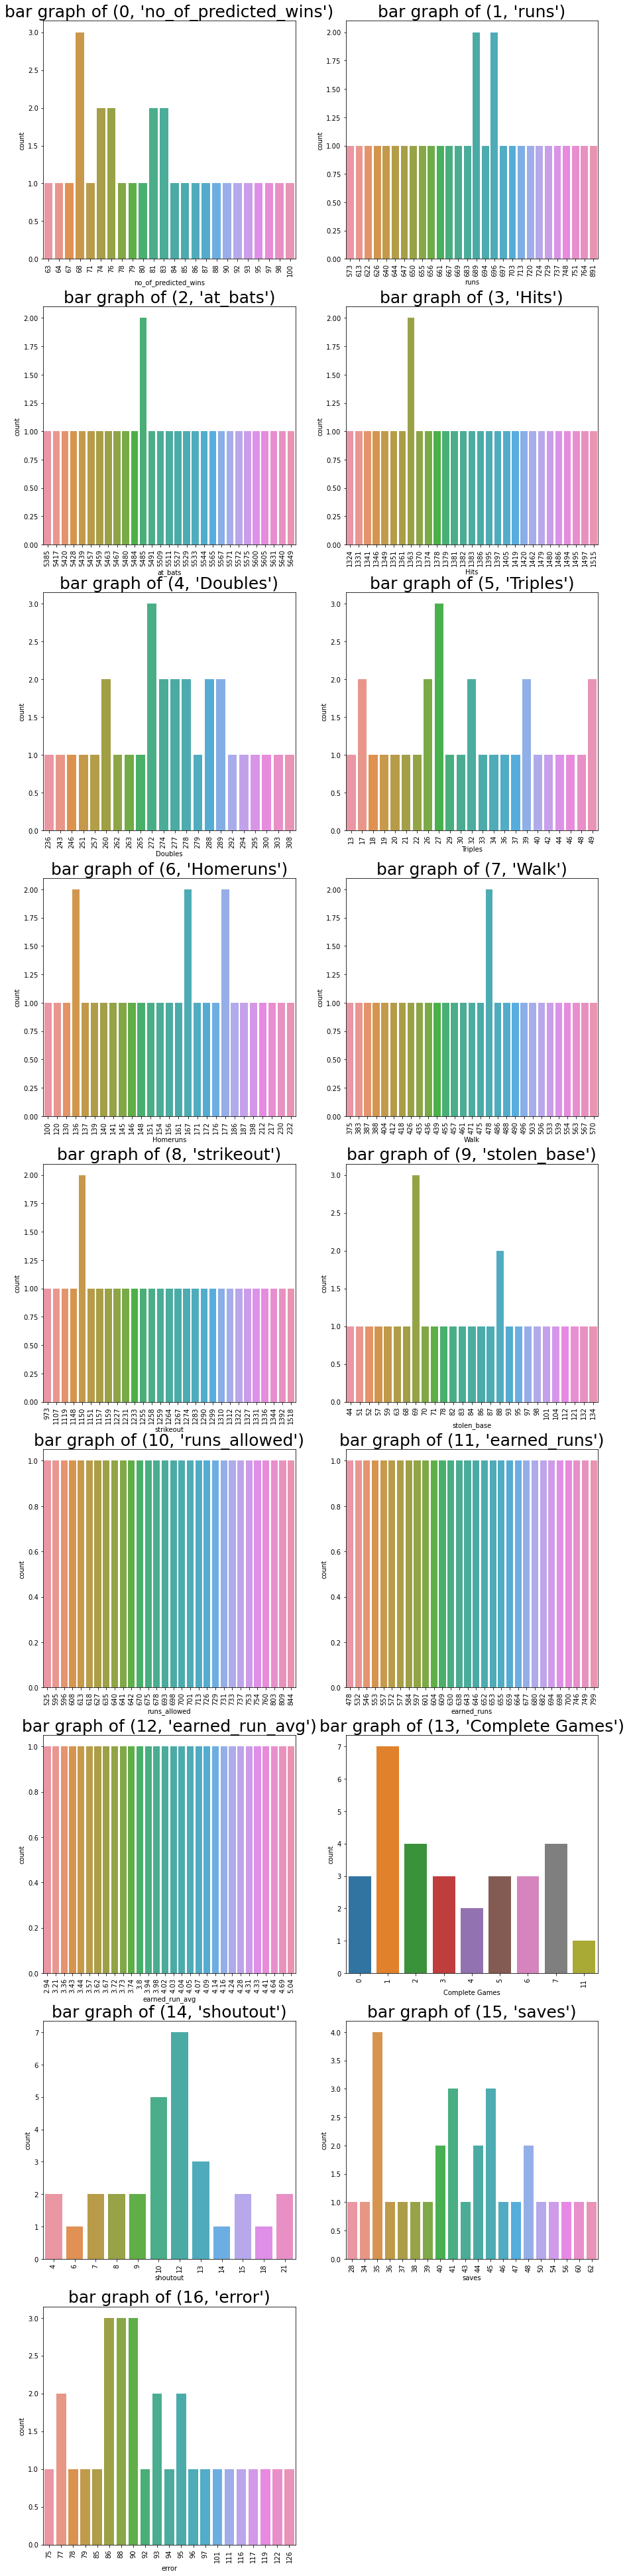

In [16]:
plt.figure(figsize=(15,70))
for i in enumerate(data):
  plt.subplot(9,2,i[0]+1)
  sns.countplot(data[i[1]])
  plt.xticks(rotation=90)
  plt.title(f"bar graph of {i}",fontsize=25)

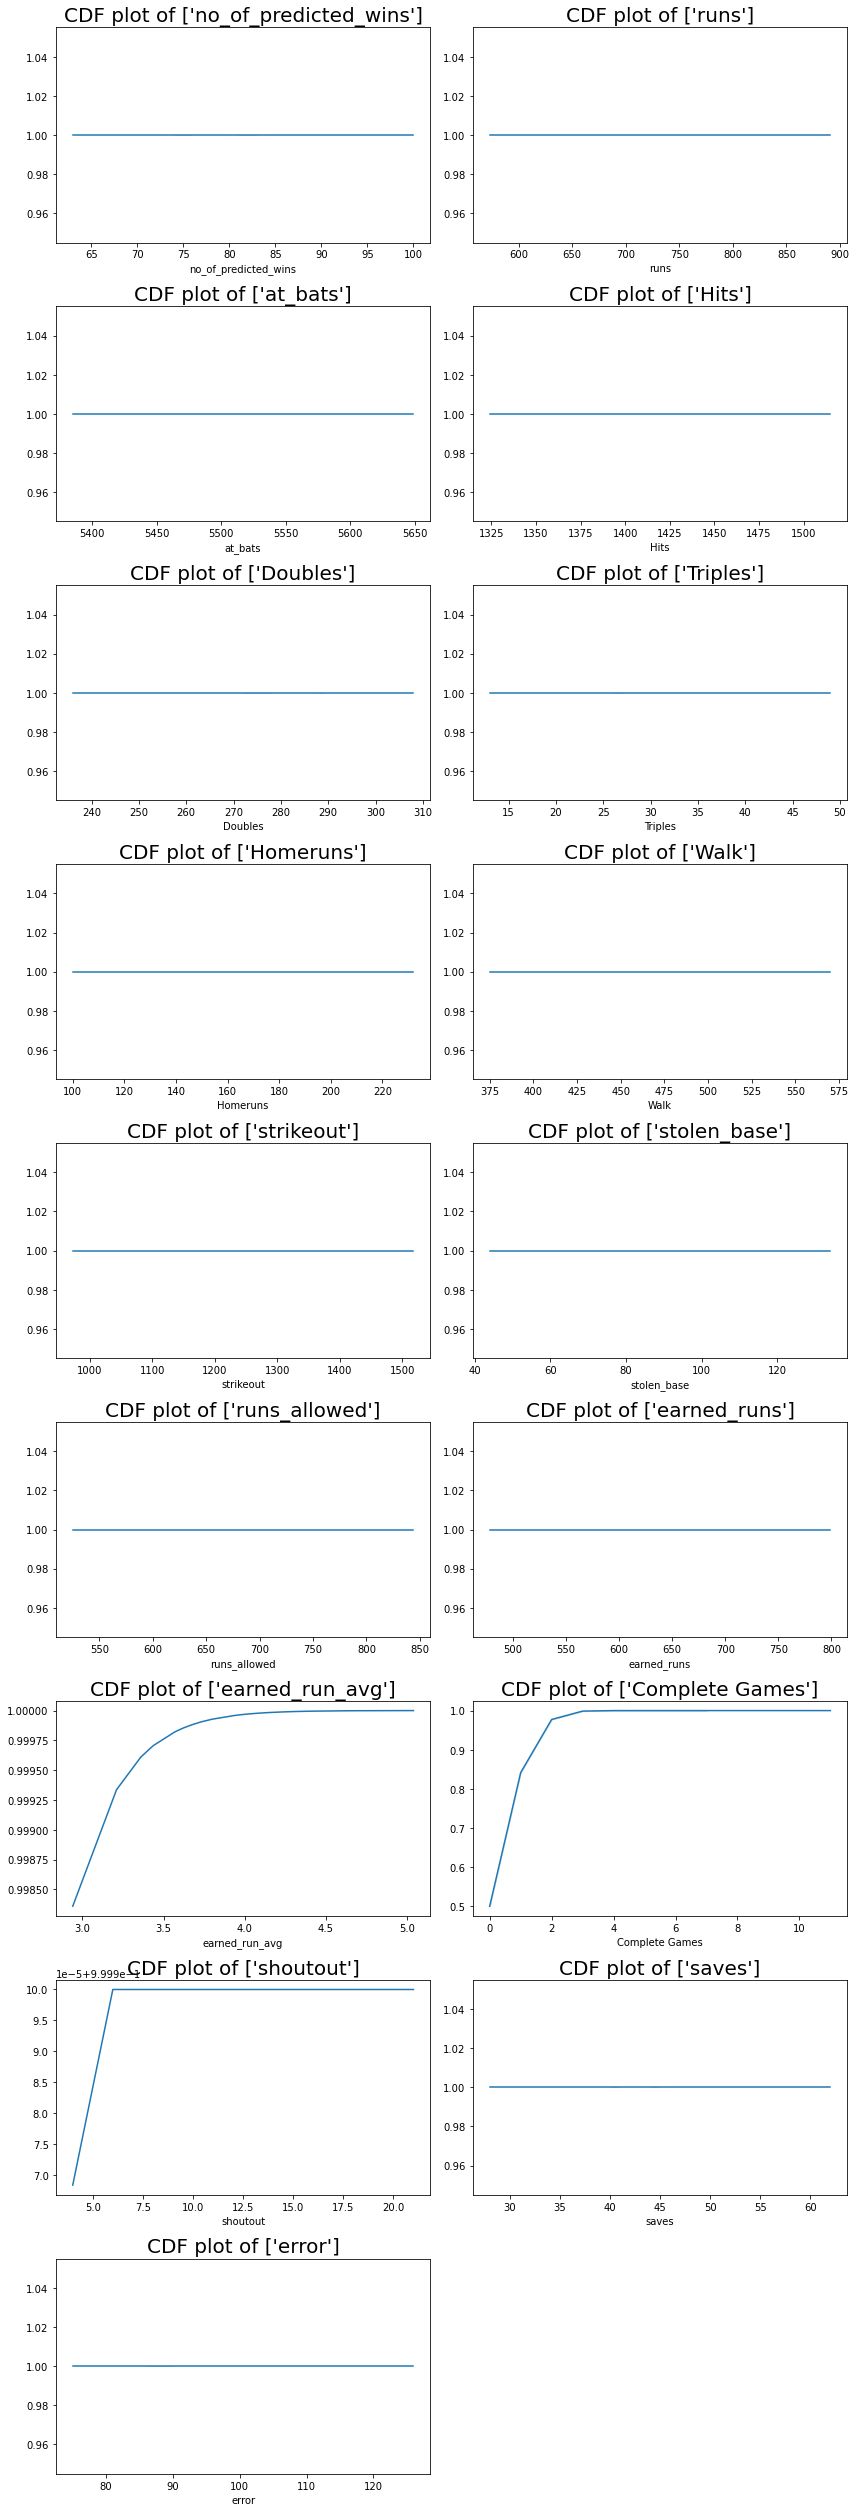

In [17]:
plt.figure(figsize=(12,35))
for i in range(0,len(col)):
  plt.subplot(9,2,i+1)

  sns.lineplot(x=data[col[i]],y=norm.cdf(data[col[i]]))
  plt.title(f"CDF plot of {[col[i]]}",fontsize=20)
  plt.tight_layout()

# Bivariate Analysis

In [18]:
data.columns

Index(['no_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error'],
      dtype='object')

In [19]:
col=['runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error']

In [20]:
df=data[col]


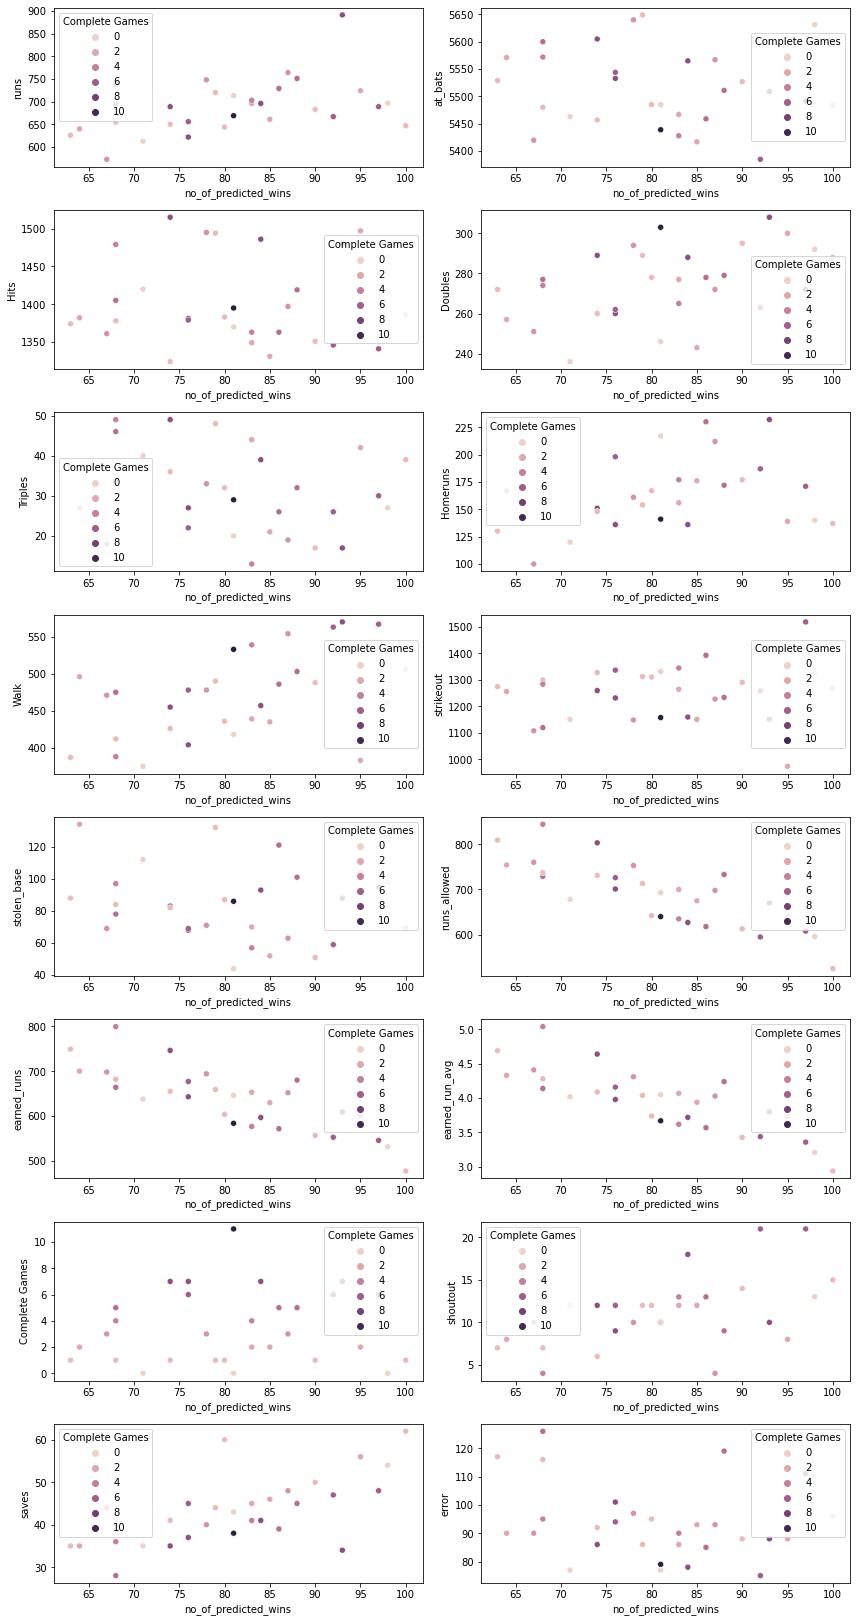

In [21]:
plt.figure(figsize=(12,25))
for i in range(0,len(col)):
  plt.subplot(9,2,i+1)
  sns.scatterplot(x=data.no_of_predicted_wins,y=data[col[i]],hue=data['Complete Games'])
  plt.tight_layout()

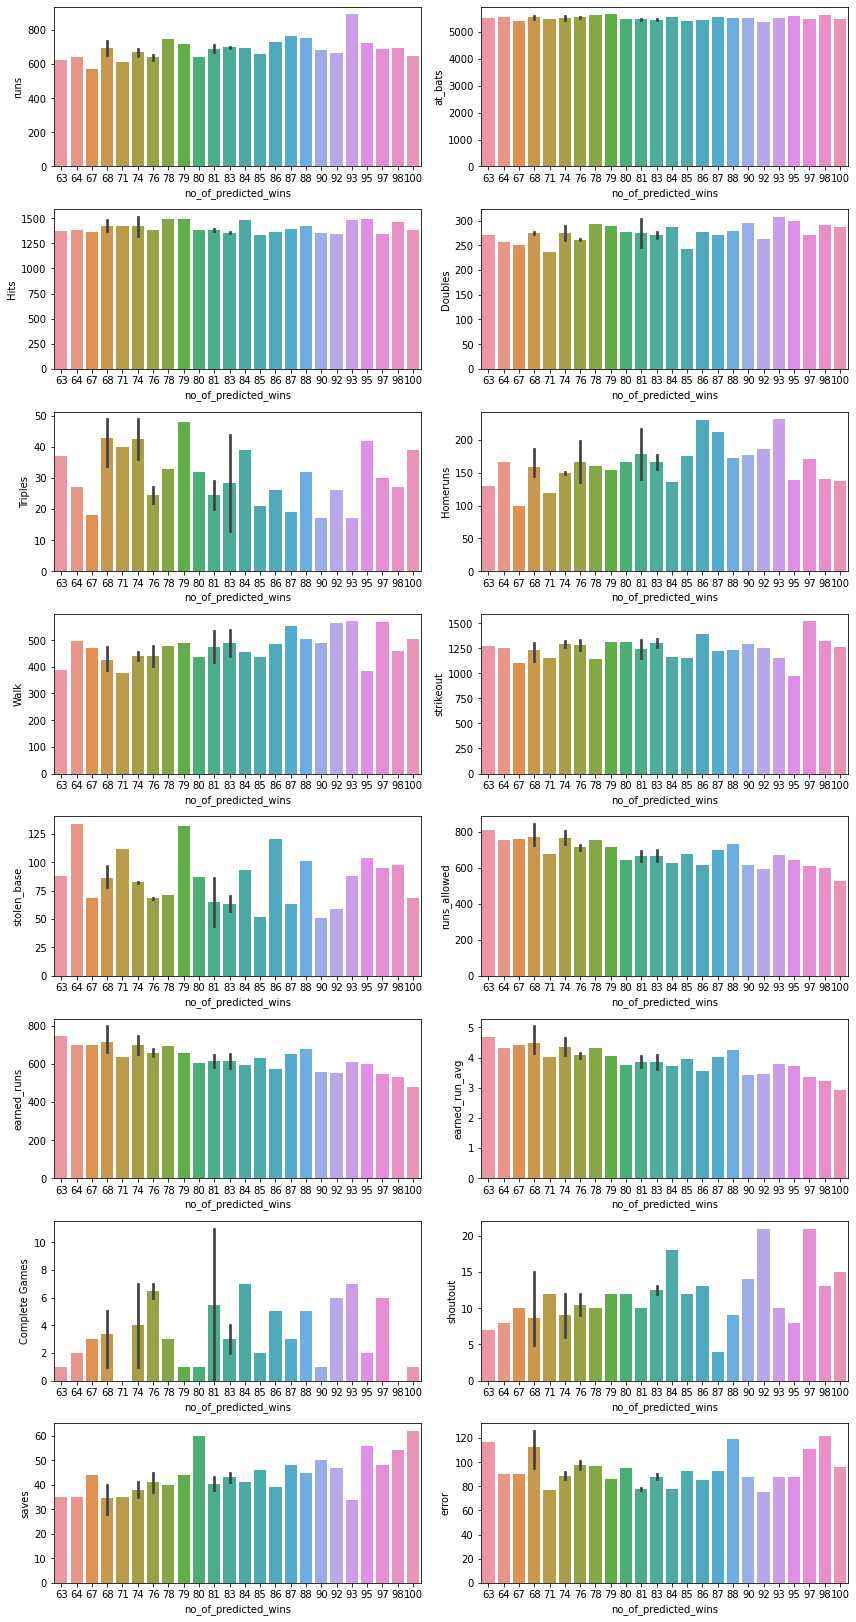

In [22]:
plt.figure(figsize=(12,25))
for i in range(0,len(col)):
  plt.subplot(9,2,i+1)
  sns.barplot(x=data.no_of_predicted_wins,y=data[col[i]])
  plt.tight_layout()

In [23]:
data1=data.groupby('no_of_predicted_wins')['runs'].max()
data1=data1.reset_index()
data1=data1.sort_values(by=('no_of_predicted_wins'),ascending=True)

# Highest number of predicted wins/Runs

Text(0.5, 1.0, 'Top 10 No. of predicted wins')

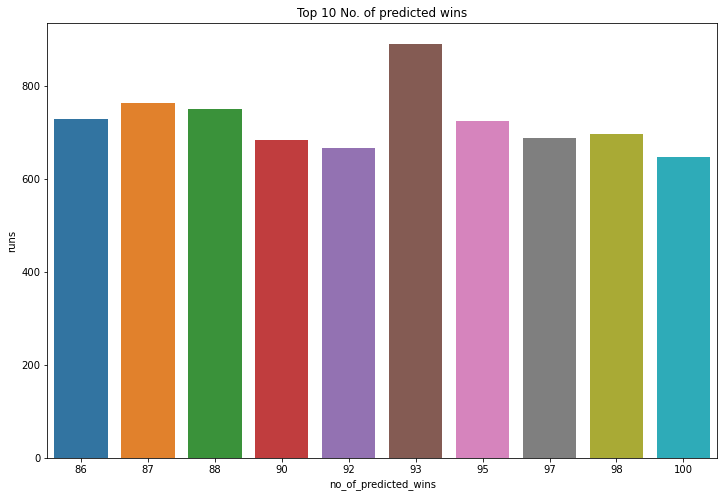

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(y='runs',x='no_of_predicted_wins',data=data1.tail(10))
plt.title("Top 10 No. of predicted wins")

NUMBER OF RUNS IS DIRECTLY PROPORTIONAL TO THE NUMBER OF WINS.


# Least number of predicted wins/Runs

Text(0.5, 1.0, 'Least 10 No. of predicted wins')

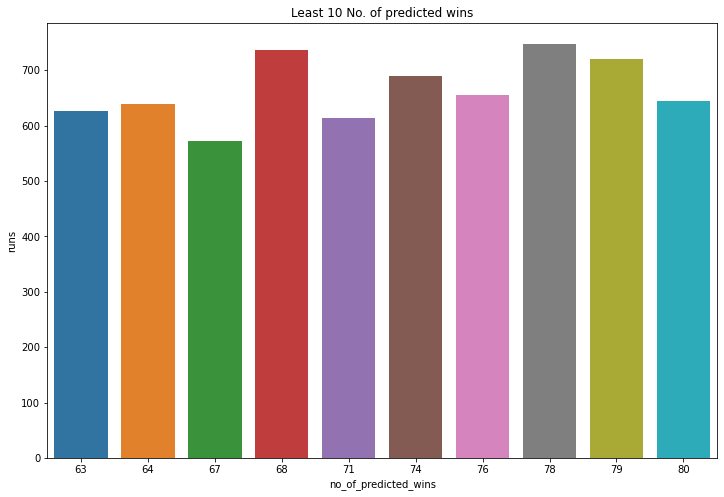

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(y='runs',x='no_of_predicted_wins',data=data1.head(10))
plt.title("Least 10 No. of predicted wins")

NUMBER OF RUNS IS INDIRECTLY PROPORTIONAL TO THE NUMBER OF WINS.

In [28]:
data.head()

,no_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shoutout,saves,error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [27]:
data2=data.groupby('no_of_predicted_wins')['Hits'].max()
data2=data2.reset_index()
data2=data2.sort_values(by=('no_of_predicted_wins'),ascending=False)

# Top hits when no.of predicted wins was high

<AxesSubplot:xlabel='no_of_predicted_wins', ylabel='Hits'>

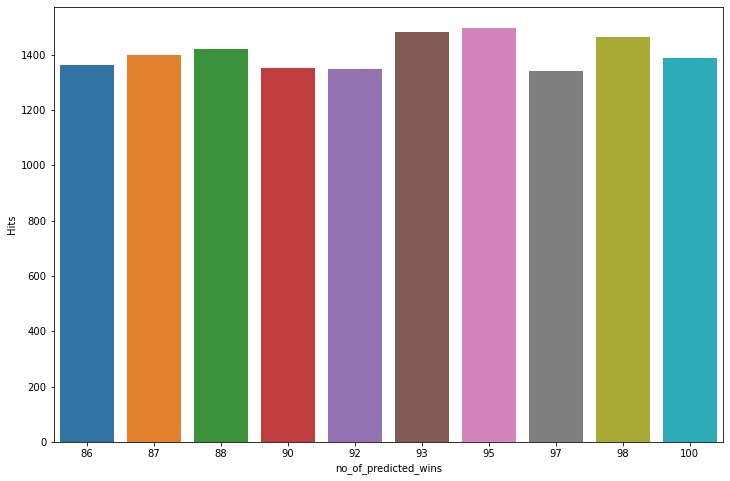

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x='no_of_predicted_wins',y='Hits',data=data2.head(10))

# Top hits when no.of predicted wins was less

<AxesSubplot:xlabel='no_of_predicted_wins', ylabel='Hits'>

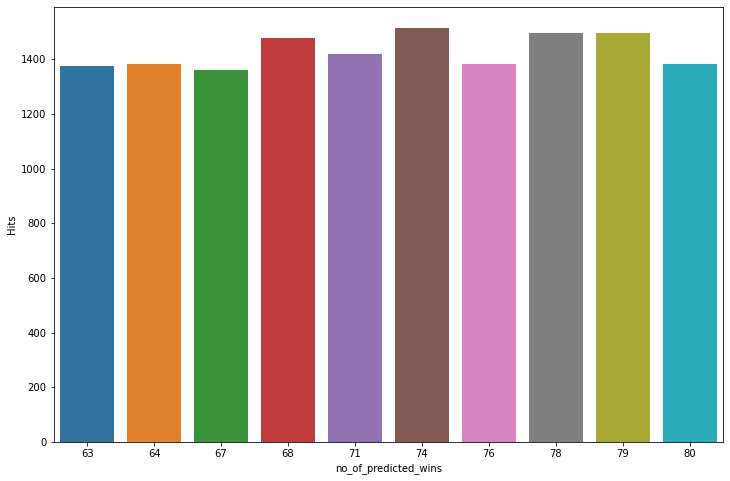

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x='no_of_predicted_wins',y='Hits',data=data2.tail(10))

In [31]:
data3=data.set_index('no_of_predicted_wins')

# Frequency of earned runs & runs as per no of prediction

<AxesSubplot:xlabel='no_of_predicted_wins', ylabel='earned_runs'>

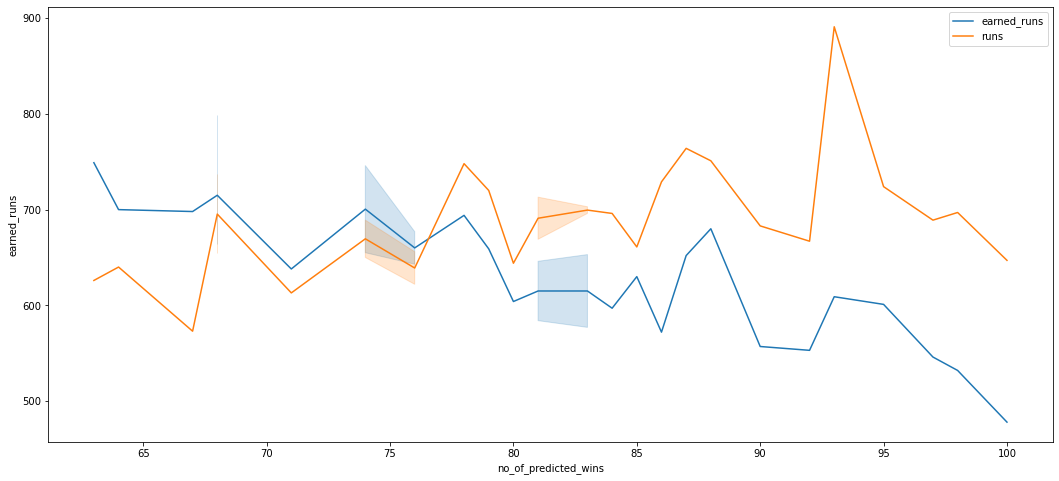

In [32]:
plt.figure(figsize=(18,8))
sns.lineplot(data=data3['earned_runs'],label='earned_runs')
sns.lineplot(data=data3['runs'],label='runs')

As the no of predictions increasing the earned runs are descreasing.

As the no_of prediction increasing the runs are also increasing. 

# Frequency of hits as per no of prediction

<AxesSubplot:xlabel='no_of_predicted_wins', ylabel='Hits'>

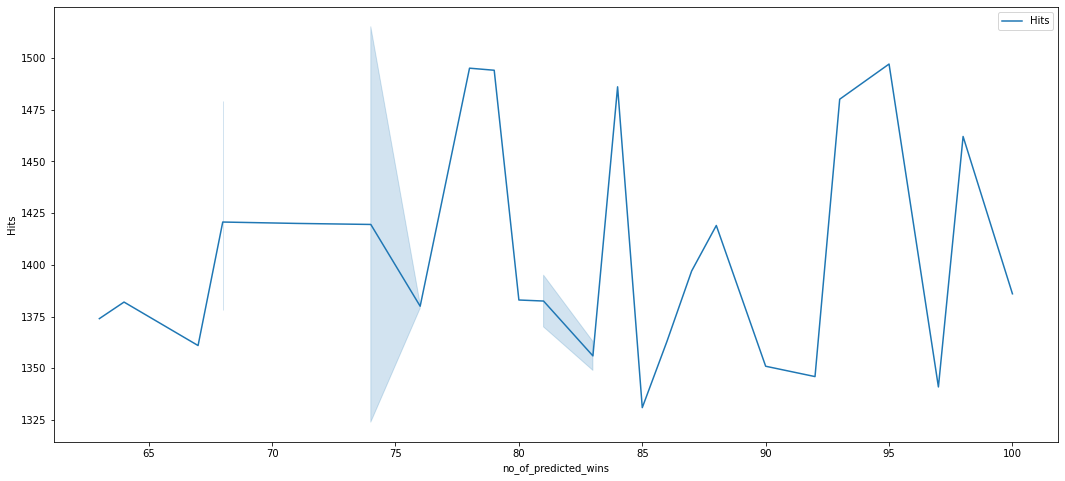

In [34]:
plt.figure(figsize=(18,8))
sns.lineplot(data=data3['Hits'],label='Hits')

As the no of prediction increases hits also gets increases.

In [36]:
data.columns

Index(['no_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error'],
      dtype='object')

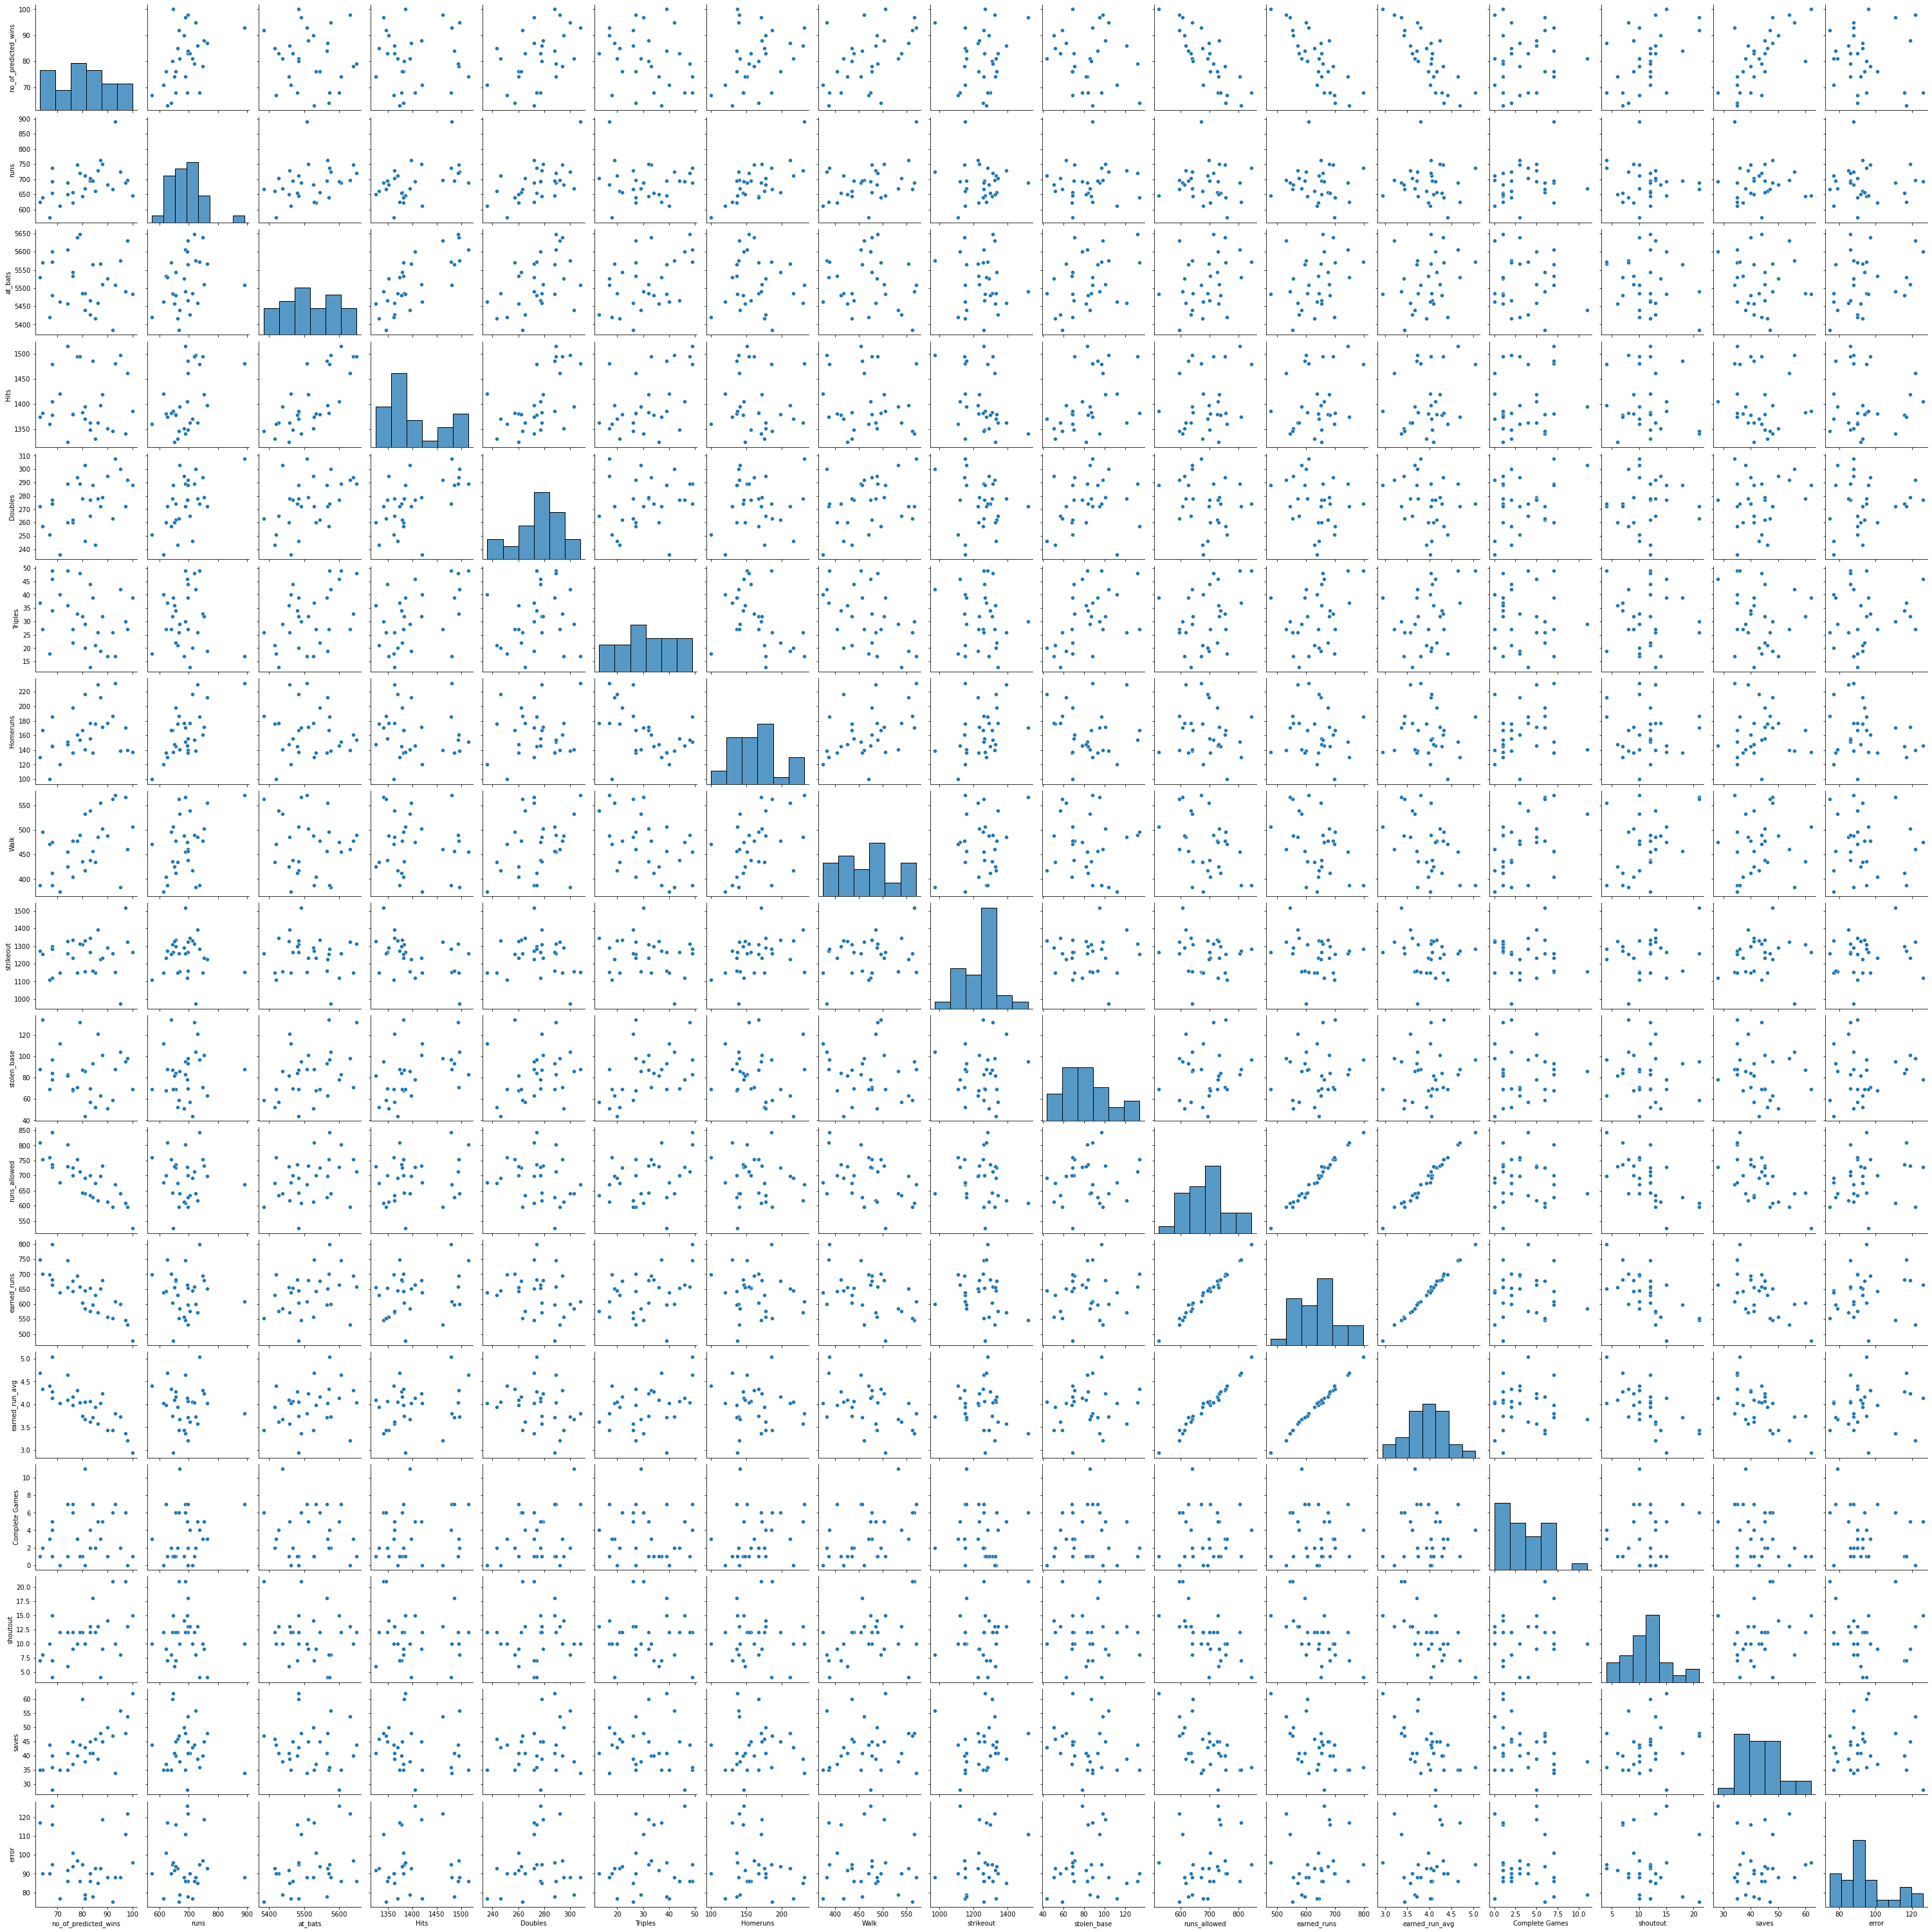

In [37]:
sns.pairplot(data)

There is a linear relationship of features with target column.

In [39]:
data.head()

,no_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shoutout,saves,error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [40]:
!pip install pingouin

In [41]:
import pingouin as pg

In [42]:
data.columns

Index(['no_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error'],
      dtype='object')

In [43]:
X=data.drop(['no_of_predicted_wins'],axis=1)
y=data['no_of_predicted_wins']

# Linear Regression

In [44]:
pg.linear_regression(X,y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,155.023133,154.836241,1.001207,0.334999,0.949726,0.88785,-179.480230,489.526496
1,runs,0.136594,0.037552,3.637429,0.003009,0.949726,0.88785,0.055467,0.217720
2,at_bats,-0.019794,0.033658,-0.588100,0.566542,0.949726,0.88785,-0.092507,0.052919
3,Hits,-0.000334,0.036103,-0.009250,0.992760,0.949726,0.88785,-0.078329,0.077662
4,Doubles,-0.120384,0.072022,-1.671486,0.118509,0.949726,0.88785,-0.275979,0.035210
5,Triples,0.023095,0.112880,0.204594,0.841058,0.949726,0.88785,-0.220768,0.266957
6,Homeruns,-0.069393,0.064855,-1.069977,0.304094,0.949726,0.88785,-0.209504,0.070717
7,Walk,-0.027957,0.022229,-1.257704,0.230622,0.949726,0.88785,-0.075980,0.020065
8,strikeout,0.002115,0.010204,0.207303,0.838986,0.949726,0.88785,-0.019928,0.024159
9,stolen_base,-0.014736,0.041316,-0.356663,0.727067,0.949726,0.88785,-0.103995,0.074523


Some columns like 'saves','runs'have linear relationship with target.

<AxesSubplot:>

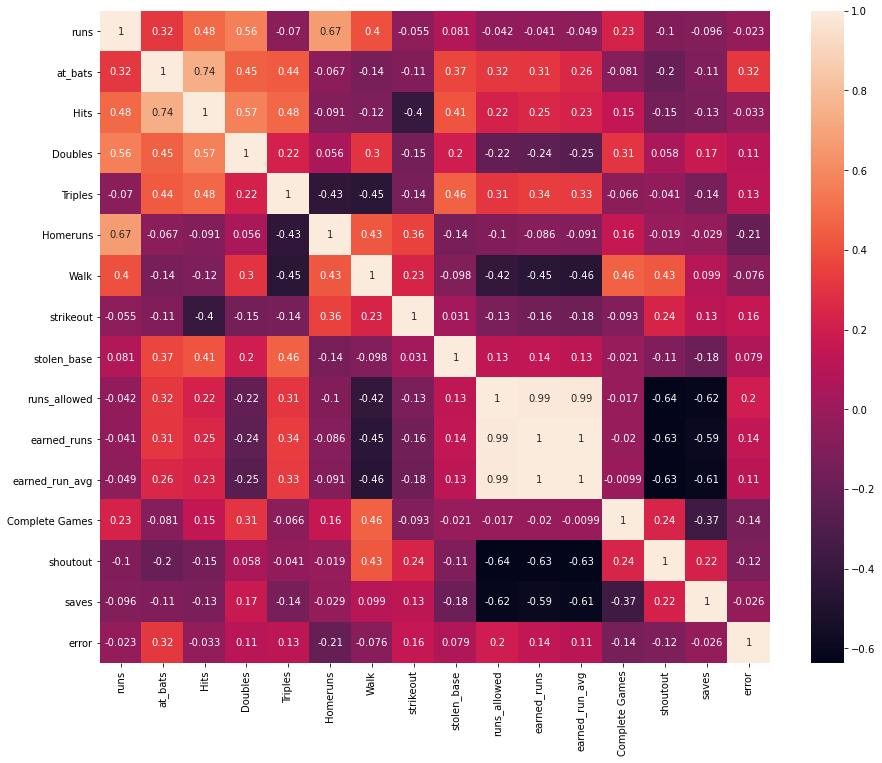

In [45]:
X_corr=X.corr()
plt.figure(figsize=(15,12))
sns.heatmap(X_corr,annot=True)

runs_allowed,earned_runs,earned_run_avg are highly correlated to earned_runs so it's been needed to drop.

In [46]:
X=X.drop(['earned_runs'],axis=1)

# Checking outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

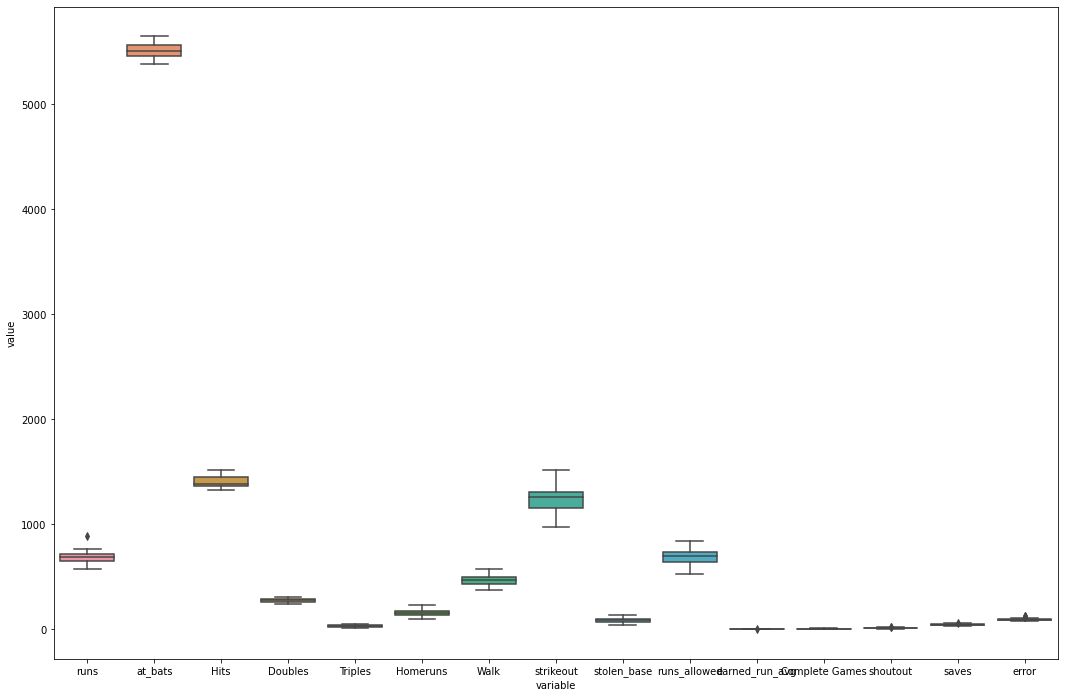

In [47]:
plt.figure(figsize=(18,12))
sns.boxplot(x='variable',y='value',data=pd.melt(X))

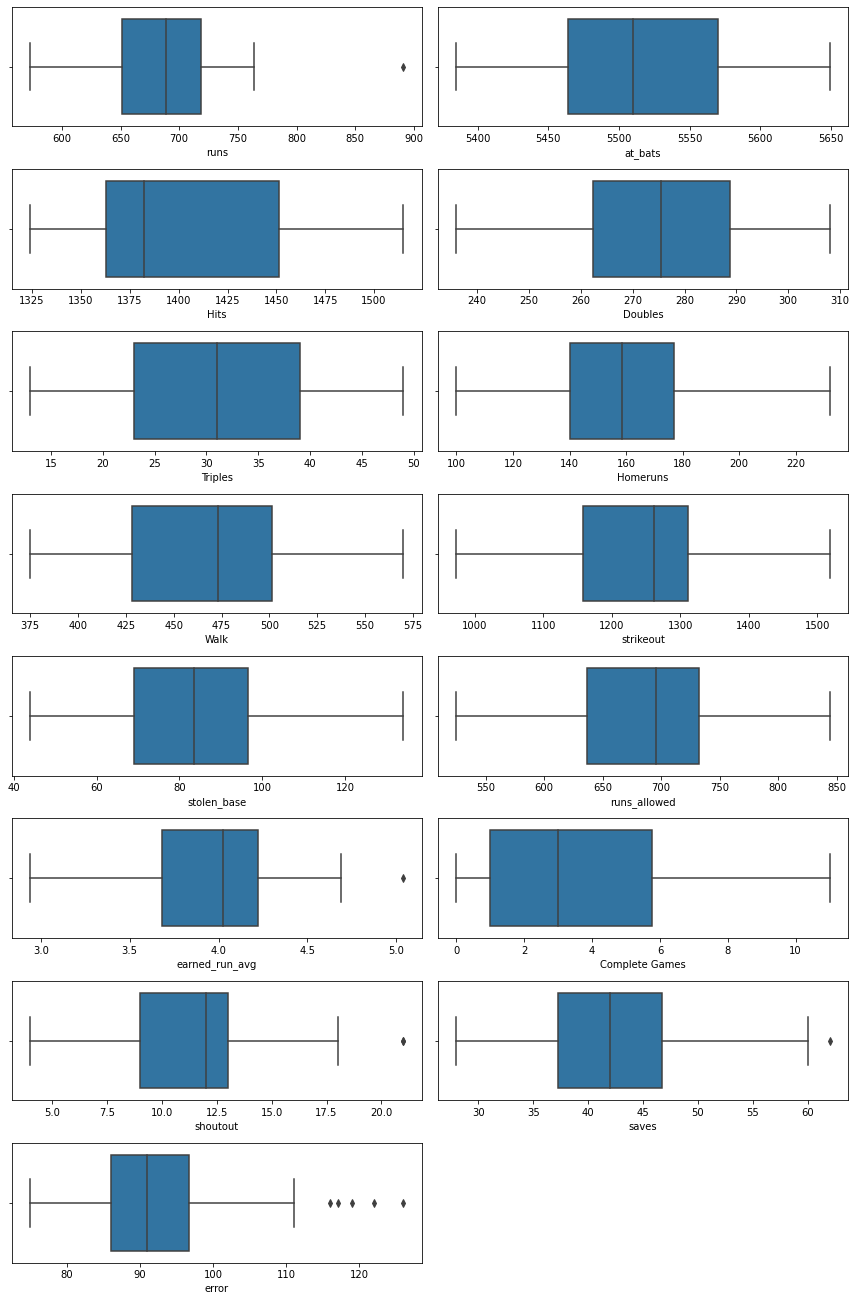

In [48]:
X_new=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_new)):
  plt.subplot(9,2,i+1)
  sns.boxplot(X[X_new[i]])
  plt.tight_layout()

### REMOVING FEW OUTLIERS 

In [49]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]] = percentile[0]
  X[col][X[col]>=percentile[1]] = percentile[1]

### AFTER REMOVING OUTLIERS 

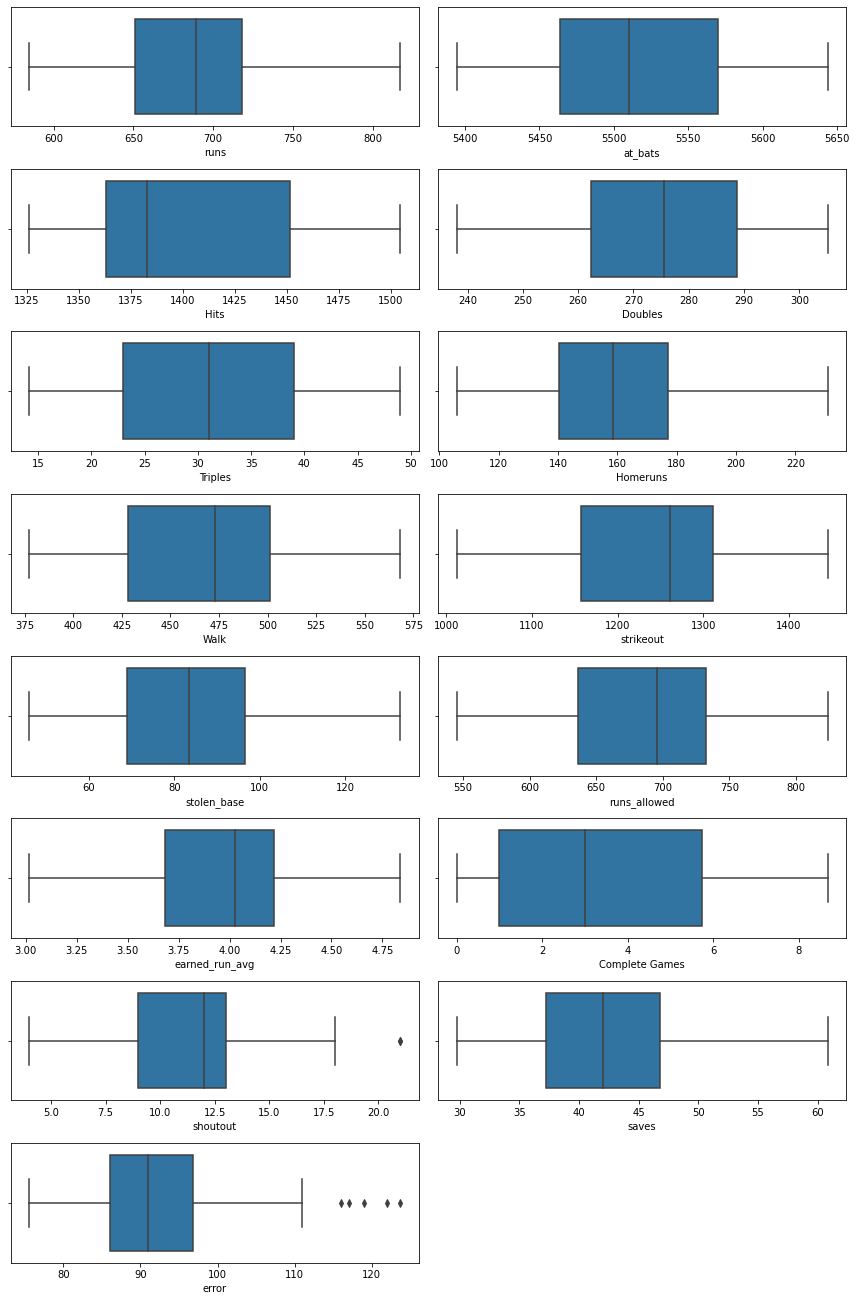

In [50]:
X_new=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_new)):
  plt.subplot(9,2,i+1)
  sns.boxplot(X[X_new[i]])
  plt.tight_layout()

No such outliers are present

### SKEWNESS

In [51]:
X.skew()

runs              0.374429
at_bats           0.204423
Hits              0.648897
Doubles          -0.239246
Triples           0.156165
Homeruns          0.582027
Walk              0.160977
strikeout        -0.361504
stolen_base       0.490160
runs_allowed      0.067041
earned_run_avg   -0.074063
Complete Games    0.390283
shoutout          0.565790
saves             0.693599
error             0.860787
dtype: float64

In [52]:
x=X

In [53]:
X1=power_transform(X,method='yeo-johnson')
X1=pd.DataFrame(X1,columns=x.columns)

### After removing skewness

In [54]:
X1.skew()

runs              0.000000
at_bats           0.000000
Hits              0.000000
Doubles          -0.043478
Triples          -0.067252
Homeruns          0.000000
Walk             -0.006992
strikeout        -0.016053
stolen_base      -0.008943
runs_allowed     -0.013854
earned_run_avg   -0.013748
Complete Games   -0.094750
shoutout          0.006560
saves             0.015250
error             0.067016
dtype: float64

In [55]:
scaler=StandardScaler()
X2=scaler.fit_transform(X1)
X2=pd.DataFrame(X2,columns=x.columns)

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=42)

In [57]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

# MODELS

In [58]:
models={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KernelRidge":KernelRidge(),
    "MLPRegressor":MLPRegressor()
}

In [59]:
!pip install scikit-plot
import scikitplot as skplt

***** LinearRegression *****


R2_SCORE 0.6891566656537147


SCORE 0.6891566656537147


MEAN_SQUARED_ERROR 41.86023569196642


MEAN_ABSOLUTE_ERROR 5.004551572114135


RMSE 6.46994866223577


MODEL LEARNING CURVE


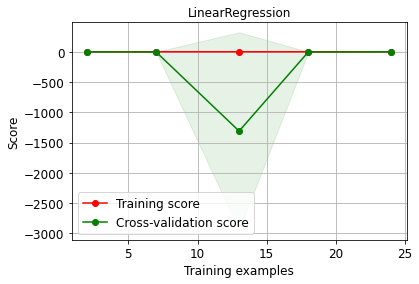

***** DecisionTreeRegressor *****


R2_SCORE 0.4191419141914191


SCORE 0.4191419141914191


MEAN_SQUARED_ERROR 78.22222222222223


MEAN_ABSOLUTE_ERROR 7.555555555555555


RMSE 8.844332774281067


MODEL LEARNING CURVE


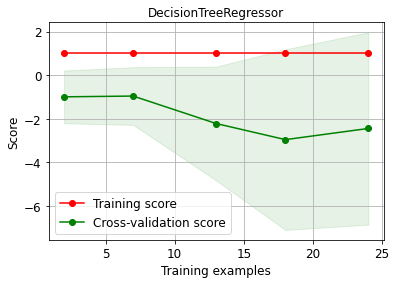

***** ExtraTreesRegressor *****


R2_SCORE 0.7032070957095709


SCORE 0.7032070957095709


MEAN_SQUARED_ERROR 39.96811111111112


MEAN_ABSOLUTE_ERROR 5.195555555555556


RMSE 6.322033779655968


MODEL LEARNING CURVE


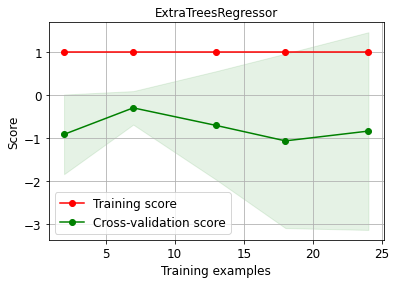

***** RandomForestRegressor *****


R2_SCORE 0.6796867161716174


SCORE 0.6796867161716174


MEAN_SQUARED_ERROR 43.1355222222222


MEAN_ABSOLUTE_ERROR 5.507777777777777


RMSE 6.567763867727143


MODEL LEARNING CURVE


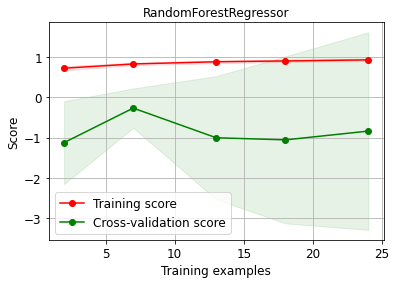

***** KernelRidge *****


R2_SCORE -79.3179483748931


SCORE -79.3179483748931


MEAN_SQUARED_ERROR 10816.15038115227


MEAN_ABSOLUTE_ERROR 101.94754988057737


RMSE 104.00072298379598


MODEL LEARNING CURVE


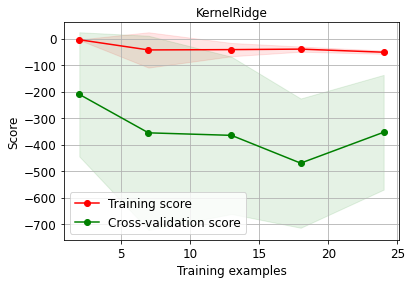

***** MLPRegressor *****


R2_SCORE -33.6612950367822


SCORE -33.6612950367822


MEAN_SQUARED_ERROR 4667.721064953336


MEAN_ABSOLUTE_ERROR 67.84048196408285


RMSE 68.3207220757607


MODEL LEARNING CURVE


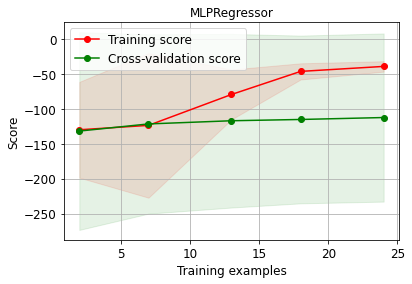

In [62]:
RMSE=[]
MSE=[]
MAE=[]
CVS=[]
R2=[]
MODEL=[]
for name,model in models.items():
  print("*****",name,"*****")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print("R2_SCORE",r2)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("\n")
  print("MEAN_SQUARED_ERROR",mse)
  print('\n')
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('MEAN_ABSOLUTE_ERROR',mae)
  print('\n')
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print("RMSE",rmse)
  print('\n')
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X2,y,cv=5,scoring='r2',text_fontsize='large',title=name)
  plt.show()

In [63]:
etree=ExtraTreesRegressor()
etree.fit(X_train,y_train)

ExtraTreesRegressor()

In [64]:
etree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
param={
 'bootstrap': [False,True],
 'max_depth': [None,1,2,3,4],
 'max_leaf_nodes': [None,1,2,3,4],
 'max_samples': [None,1,2,3],
 'min_impurity_split': [None,1,2,3,4],
 'min_samples_leaf': [1,None,2,3],
 'min_samples_split': [2,1,3,4]
}

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid=GridSearchCV(estimator=etree,param_grid=param,cv=2,n_jobs=-1)

In [68]:
grid.fit(X2,y)

GridSearchCV(cv=2, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 1, 2, 3, 4],
                         'max_leaf_nodes': [None, 1, 2, 3, 4],
                         'max_samples': [None, 1, 2, 3],
                         'min_impurity_split': [None, 1, 2, 3, 4],
                         'min_samples_leaf': [1, None, 2, 3],
                         'min_samples_split': [2, 1, 3, 4]})

In [69]:
grid.best_score_

0.14351880736785394

In [70]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 1,
 'max_leaf_nodes': None,
 'max_samples': 3,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# Hyperparameter tuning

In [71]:
ETREE=ExtraTreesRegressor(bootstrap= True,
 max_depth= 3,
 max_leaf_nodes= None,
 max_samples= 3,
 min_impurity_split=1,
 min_samples_leaf= 1,
 min_samples_split= 2)

In [72]:
ETREE.fit(X_train,y_train)
ETREE.score(X_test,y_test)

0.2820807343234317

# FINAL METRICS

In [73]:
y_pred=ETREE.predict(X_test)
print("mean_square_error",mean_squared_error(y_pred,y_test))
print("mean_absolute_error",mean_absolute_error(y_pred,y_test))
print("Root_mean_square_error",np.sqrt(mean_squared_error(y_pred,y_test)))
print("r2_score",r2_score(y_pred,y_test))

mean_square_error 96.67979444444452
mean_absolute_error 7.893333333333339
Root_mean_square_error 9.832588389861773
r2_score -25.31132061366613


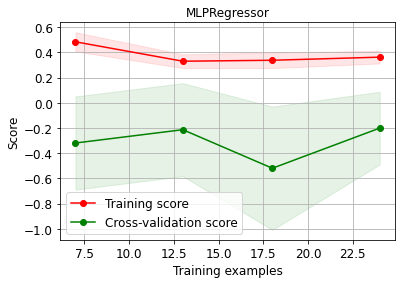

In [74]:
skplt.estimators.plot_learning_curve(ETREE,X2,y,cv=5,scoring='r2',text_fontsize='large',title=name)
plt.show()

BECAUSE OF VERY SHORT DATA PROVIDED HYPERPARAMETER TUNING IS NOT WORKING

# Saving model

In [75]:
import joblib
joblib.dump(etree,"Baseball.obj")

['Baseball.obj']

In [76]:
model.predict(X_test)

array([ 8.28025437, 24.5611032 ,  6.84643514, 20.70050903,  9.78879617,
        8.83657419,  8.83544553, 13.58278163, 11.00376305])